In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_ffiv = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/ffiv_Stock.csv"
df_ffiv = pd.read_csv(csv_ffiv, thousands=',')

In [3]:
df_ffiv.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400
1,3/4/2019,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700
2,3/5/2019,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300
3,3/6/2019,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000
4,3/7/2019,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200


In [4]:
df_ffiv.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,163.434992,163.434992,165.268542,161.482228,163.397160,6.147710e+05
std,29.329932,29.329932,29.577160,29.115418,29.336975,3.981027e+05
min,90.550003,90.550003,93.830002,79.779999,88.750000,1.205000e+05
25%,141.537506,141.537506,143.384998,139.952503,141.632496,3.971500e+05
50%,155.590004,155.590004,157.345001,154.154999,156.070000,5.293500e+05
75%,186.022503,186.022503,187.654995,184.379997,186.260002,6.974750e+05
max,247.779999,247.779999,249.000000,245.899994,247.779999,5.232700e+06


In [5]:
df_ffiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [6]:
# Convert object to datetime64
df_ffiv['Date'] = df_ffiv['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_ffiv = df_ffiv.sort_values(by="Date").reset_index(drop=True)
df_ffiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1324 non-null   datetime64[ns]
 1   Symbol     1324 non-null   object        
 2   Adj Close  1324 non-null   float64       
 3   Close      1324 non-null   float64       
 4   High       1324 non-null   float64       
 5   Low        1324 non-null   float64       
 6   Open       1324 non-null   float64       
 7   Volume     1324 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [7]:
df_ffiv.Close

0       166.529999
1       163.289993
2       162.149994
3       161.080002
4       158.990005
           ...    
1319    168.339996
1320    168.229996
1321    167.300003
1322    168.970001
1323    166.910004
Name: Close, Length: 1324, dtype: float64

In [8]:
df_ffiv['Prev_close'] = df_ffiv.shift(1)['Close']
df_ffiv.Prev_close

0              NaN
1       166.529999
2       163.289993
3       162.149994
4       161.080002
           ...    
1319    169.899994
1320    168.339996
1321    168.229996
1322    167.300003
1323    168.970001
Name: Prev_close, Length: 1324, dtype: float64

In [9]:
df_ffiv.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-03-01,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400,NaN
1,2019-03-04,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700,166.529999
2,2019-03-05,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300,163.289993
3,2019-03-06,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000,162.149994
4,2019-03-07,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200,161.080002


In [10]:
df_ffiv['Close_change'] = df_ffiv.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [11]:
df_ffiv.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-03-01,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400,NaN,0.000000
1,2019-03-04,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700,166.529999,-3.240005
2,2019-03-05,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300,163.289993,-1.139999
3,2019-03-06,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000,162.149994,-1.069992
4,2019-03-07,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200,161.080002,-2.089996


In [12]:
rows = []
for _,row in tqdm(df_ffiv.iterrows(), total=df_ffiv.shape[0]):
    row_data = dict(
        day = row.Date.day,
        month = row.Date.month,
        year = row.Date.year,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_ffiv = pd.DataFrame(rows)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [13]:
features_ffiv.head()

,day,month,year,open,low,high,close,volume,close_change
0,1,3,2019,167.600006,166.529999,168.330002,166.529999,756400,0.000000
1,4,3,2019,166.970001,163.289993,167.289993,163.289993,553700,-3.240005
2,5,3,2019,163.240005,162.149994,163.399994,162.149994,511300,-1.139999
3,6,3,2019,161.919998,161.080002,162.139999,161.080002,527000,-1.069992
4,7,3,2019,160.630005,158.990005,161.250000,158.990005,783200,-2.089996


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_ffiv, 'close')

Empty DataFrame
Columns: [day, month, year, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_ffiv, 'volume')

      day  month  year        open         low        high       close   
7      12      3  2019  153.639999  149.649994  154.699997  149.649994  \
8      13      3  2019  149.779999  151.750000  153.119995  151.750000   
60     28      5  2019  137.850006  136.639999  138.710007  136.639999   
73     14      6  2019  140.449997  136.929993  142.330002  136.929993   
78     21      6  2019  142.210007  143.729996  143.860001  143.729996   
...   ...    ...   ...         ...         ...         ...         ...   
1197   30     11  2023  170.130005  171.190002  172.169998  171.190002   
1208   15     12  2023  176.919998  177.619995  177.919998  177.619995   
1236   29      1  2024  183.789993  185.369995  185.919998  185.369995   
1237   30      1  2024  195.009995  186.839996  199.490005  186.839996   
1300   30      4  2024  162.250000  165.309998  170.000000  165.309998   

       volume  close_change  
7     2278500    -12.440002  
8     1252400      2.100006  
60    1217900     -0.

In [17]:
detect_outlier(features_ffiv, 'close_change')

      day  month  year        open         low        high       close   
7      12      3  2019  153.639999  149.649994  154.699997  149.649994  \
73     14      6  2019  140.449997  136.929993  142.330002  136.929993   
165    24     10  2019  150.000000  145.940002  153.000000  145.940002   
229    28      1  2020  125.040001  126.000000  131.309998  126.000000   
257     9      3  2020  114.000000  111.690002  119.639999  111.690002   
259    11      3  2020  114.730003  107.800003  115.589996  107.800003   
260    12      3  2020  101.089996   98.330002  104.559998   98.330002   
261    13      3  2020  103.220001  105.699997  105.779999  105.699997   
262    16      3  2020   95.169998   95.660004  100.059998   95.660004   
265    19      3  2020   89.059998   98.330002  101.239998   98.330002   
270    26      3  2020  105.180000  114.050003  115.349998  114.050003   
292    28      4  2020  147.850006  140.860001  153.559998  140.860001   
302    12      5  2020  148.699997  14

In [18]:
train_size = int(0.7 * len(features_ffiv))
test_size = len(features_ffiv)-train_size

train_ffiv_df = features_ffiv[:train_size]
test_ffiv_df = features_ffiv[train_size:]

In [19]:
#Quá trình Training
x_train = np.array(train_ffiv_df.index).reshape(-1, 1)
y_train = np.array(train_ffiv_df['close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# In các thông số của mô hình
print("Hệ số hồi quy (slope):", model.coef_)
print("Sai số chệch (intercept):", model.intercept_)

Hệ số hồi quy (slope): [0.06941155]
Sai số chệch (intercept): 133.21643540176993


In [20]:
#Quá trình testing
x_test = np.array(test_ffiv_df.index).reshape(-1, 1)
y_test = np.array(test_ffiv_df['close'])
y_pred = model.predict(x_test)

In [21]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = features_ffiv.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[225.11732531 225.18673686 225.25614841 225.32555995 225.3949715
 225.46438305 225.5337946  225.60320615 225.6726177  225.74202924
 225.81144079 225.88085234 225.95026389 226.01967544 226.08908698
 226.15849853 226.22791008 226.29732163 226.36673318 226.43614473
 226.50555627 226.57496782 226.64437937 226.71379092 226.78320247
 226.85261402 226.92202556 226.99143711 227.06084866 227.13026021]


In [22]:
#Quá trình tạo index predict 60 ngày tiếp theo
last_index = features_ffiv.index[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[225.11732531 225.18673686 225.25614841 225.32555995 225.3949715
 225.46438305 225.5337946  225.60320615 225.6726177  225.74202924
 225.81144079 225.88085234 225.95026389 226.01967544 226.08908698
 226.15849853 226.22791008 226.29732163 226.36673318 226.43614473
 226.50555627 226.57496782 226.64437937 226.71379092 226.78320247
 226.85261402 226.92202556 226.99143711 227.06084866 227.13026021
 227.19967176 227.26908331 227.33849485 227.4079064  227.47731795
 227.5467295  227.61614105 227.68555259 227.75496414 227.82437569
 227.89378724 227.96319879 228.03261034 228.10202188 228.17143343
 228.24084498 228.31025653 228.37966808 228.44907963 228.51849117
 228.58790272 228.65731427 228.72672582 228.79613737 228.86554892
 228.93496046 229.00437201 229.07378356 229.14319511 229.21260666]


In [23]:
#Quá trình tạo index predict 90 ngày tiếp theo
last_index = features_ffiv.index[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[225.11732531 225.18673686 225.25614841 225.32555995 225.3949715
 225.46438305 225.5337946  225.60320615 225.6726177  225.74202924
 225.81144079 225.88085234 225.95026389 226.01967544 226.08908698
 226.15849853 226.22791008 226.29732163 226.36673318 226.43614473
 226.50555627 226.57496782 226.64437937 226.71379092 226.78320247
 226.85261402 226.92202556 226.99143711 227.06084866 227.13026021
 227.19967176 227.26908331 227.33849485 227.4079064  227.47731795
 227.5467295  227.61614105 227.68555259 227.75496414 227.82437569
 227.89378724 227.96319879 228.03261034 228.10202188 228.17143343
 228.24084498 228.31025653 228.37966808 228.44907963 228.51849117
 228.58790272 228.65731427 228.72672582 228.79613737 228.86554892
 228.93496046 229.00437201 229.07378356 229.14319511 229.21260666
 229.28201821 229.35142975 229.4208413  229.49025285 229.5596644
 229.62907595 229.69848749 229.76789904 229.83731059 229.90672214
 229.97613369 230.04554524 230.

In [24]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing RMSE: 53.36860761459759
Testing MAE: 52.21876654657142
Testing MAPE: 0.33837121195321435


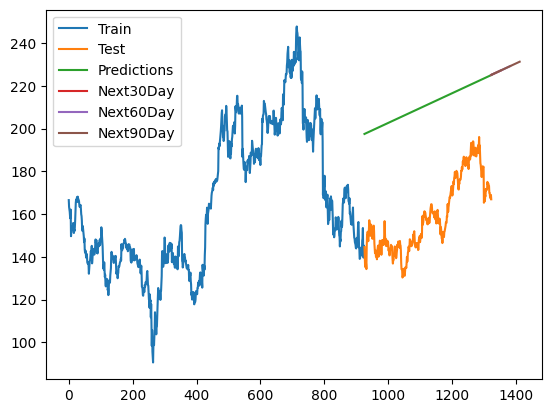

In [25]:
#Vẽ hình
plt.plot(train_ffiv_df.index, train_ffiv_df['close'])
plt.plot(test_ffiv_df.index, test_ffiv_df['close'])
plt.plot(test_ffiv_df.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()